# Movie Recommendation Systems

# Notebook 5: Modelling

In [1]:
#Run initial set up first
%run ./04_Data_Preparation.ipynb

Number of nulls in "movies" dataframe: 
 movieId    0
title      0
genres     0
dtype: int64

 Number of duplicate rows in "movies" dataframe : 0
Number of duplicates:  5


,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller


Number of nulls in "ratings" dataframe: 
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

 Number of duplicates rows in "ratings" dataframe : 0
List of original movieIds:  [838, 2851, 6003, 32600, 34048]
List of duplicate movieIds:  [26958, 64997, 144606, 147002, 168358]


<ipython-input-1-da48865549e6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['title'] = movies['title'].str.replace('(\(\d\d\d\d\))', '')


,original_id,duplicate_id
0,838,26958
1,2851,64997
2,6003,144606
3,32600,147002
4,34048,168358


Number of movies in "ratings":  9719
Number of movies in "movies":  9737


RuntimeError: This event loop is already running

RuntimeError: This event loop is already running

## 6. Modelling

## Models: 
Examples of two types of recommendation systems were built here, excluding hybrid recommendation systems.  

1. **Content-based filtering**: using item attributes to make recommendations - built one from scratch using movie genre information (section 6.1)

2. **Collaborative filtering**: two types - memory-based and model-based to understand users' behaviours 
    
    * *Memory-based*: built using the data - both user-based and item-based (memory-based) collaborative filtering were built from scratch 
        * User-based: finds similar users to predict ratings of each users' unseen movies based on historical ratings (section 6.2)
        * Item-based: finds similar items based on historical user ratings to predict unseen movie ratings for each user (section 6.3)
    * *Model-based*: installed the Surprise package to apply the SVD, KNNBasic and KNNWithMeans algorithms to predict unseen movie ratings for each user (section 6.4).

### 6.1 Content-based filtering

*6.1.1 User profiles*

In [95]:
#1. Store user profiles
user_profiles = []

for index in user_items.index: 
    user_movies = user_items['movieId'][index]
    user_rating = user_items['rating'][index]
    
    #Convert list to array
    user_rating = np.array(user_rating)
    #Convert dataframe to a numpy array
    user_genres = genres_.reset_index()[genres_.reset_index()['movieId'].isin(user_movies)]
    user_genres = user_genres.set_index('movieId')
    user_genres = user_genres.to_numpy()

    #Dot product of arrays to compute user profile
    user_profile = user_rating.dot(user_genres)

    #Convert user profile values between 0 and 1
    profile_sum = sum(user_profile)
    user_profile = [x/profile_sum for x in user_profile]
    
    #Append to 'user_profiles'
    user_profiles.append(user_profile)

In [96]:
#Convert to dataframe of user profiles
user_profiles = pd.DataFrame(user_profiles)
user_profiles.shape

(610, 20)

*6.1.2 Compute recommendation scores (between 0 and 1)*

In [97]:
#Create genres matrix (genres x movieIds)
genres_array = genres_.transpose().to_numpy()

In [98]:
#2. Dot product of user profiles and genres to compute recommendation scores
content_rec = pd.DataFrame(np.dot(user_profiles,genres_array))

content_rec.index = userIds
content_rec.index.name = 'userId'

content_rec.columns = movieIds
content_rec.columns.name = 'movieId'

content_rec

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,0.427517,0.266059,0.157552,0.246094,0.115885,0.269097,0.157552,0.194444,0.129774,0.332031,...,0.350260,0.134115,0.204427,0.045573,0.000000,0.362847,0.233073,0.088542,0.175347,0.115885
2,0.151079,0.035971,0.139089,0.323741,0.115108,0.419664,0.139089,0.035971,0.143885,0.309353,...,0.309353,0.184652,0.299760,0.000000,0.057554,0.258993,0.115108,0.184652,0.143885,0.115108
3,0.211679,0.143552,0.085158,0.175182,0.058394,0.330900,0.085158,0.119221,0.160584,0.433090,...,0.445255,0.099757,0.148418,0.009732,0.000000,0.253041,0.092457,0.090024,0.170316,0.058394
4,0.332571,0.125858,0.286804,0.516400,0.193745,0.180015,0.286804,0.087719,0.050343,0.189931,...,0.277651,0.242563,0.423341,0.012967,0.006102,0.295195,0.244851,0.229596,0.063310,0.193745
5,0.360795,0.198864,0.173295,0.406250,0.099432,0.198864,0.173295,0.147727,0.045455,0.156250,...,0.221591,0.295455,0.332386,0.062500,0.000000,0.258523,0.213068,0.232955,0.107955,0.099432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.288769,0.112789,0.289930,0.553696,0.160063,0.177278,0.289930,0.075625,0.058000,0.183495,...,0.263287,0.279683,0.423828,0.015917,0.002254,0.271144,0.213144,0.263766,0.073917,0.160063
607,0.273376,0.157031,0.165596,0.336188,0.104211,0.329764,0.165596,0.118487,0.137045,0.351178,...,0.306210,0.182727,0.274804,0.012134,0.000000,0.291934,0.154889,0.170592,0.149179,0.104211
608,0.325360,0.154248,0.194299,0.324443,0.148016,0.307946,0.194299,0.110072,0.120246,0.314087,...,0.364769,0.153240,0.278160,0.023096,0.003483,0.335533,0.215287,0.130144,0.143342,0.148016


In [99]:
#Unseen movies (predicted)
pred_ui_bool

,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
607,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
608,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
609,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [100]:
#3. Only show scores of unseen movies (recommendations only)
rec_scores_df = pred_ui_bool*content_rec
rec_scores_df

,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
1,0.000000,0.266059,0.000000,0.246094,0.115885,0.000000,0.157552,0.194444,0.129774,0.332031,...,0.350260,0.134115,0.204427,0.045573,0.000000,0.362847,0.233073,0.088542,0.175347,0.115885
2,0.151079,0.035971,0.139089,0.323741,0.115108,0.419664,0.139089,0.035971,0.143885,0.309353,...,0.309353,0.184652,0.299760,0.000000,0.057554,0.258993,0.115108,0.184652,0.143885,0.115108
3,0.211679,0.143552,0.085158,0.175182,0.058394,0.330900,0.085158,0.119221,0.160584,0.433090,...,0.445255,0.099757,0.148418,0.009732,0.000000,0.253041,0.092457,0.090024,0.170316,0.058394
4,0.332571,0.125858,0.286804,0.516400,0.193745,0.180015,0.286804,0.087719,0.050343,0.189931,...,0.277651,0.242563,0.423341,0.012967,0.006102,0.295195,0.244851,0.229596,0.063310,0.193745
5,0.360795,0.198864,0.173295,0.406250,0.099432,0.198864,0.173295,0.147727,0.045455,0.156250,...,0.221591,0.295455,0.332386,0.062500,0.000000,0.258523,0.213068,0.232955,0.107955,0.099432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.000000,0.112789,0.289930,0.553696,0.160063,0.177278,0.289930,0.075625,0.058000,0.183495,...,0.263287,0.279683,0.423828,0.015917,0.000000,0.271144,0.213144,0.263766,0.073917,0.160063
607,0.000000,0.157031,0.165596,0.336188,0.104211,0.329764,0.165596,0.118487,0.137045,0.351178,...,0.306210,0.182727,0.274804,0.012134,0.000000,0.291934,0.154889,0.170592,0.149179,0.104211
608,0.325360,0.000000,0.000000,0.324443,0.148016,0.307946,0.194299,0.110072,0.120246,0.314087,...,0.364769,0.153240,0.278160,0.023096,0.003483,0.335533,0.215287,0.130144,0.143342,0.148016
609,0.162896,0.085973,0.149321,0.361991,0.076923,0.389140,0.149321,0.085973,0.126697,0.000000,...,0.257919,0.212670,0.289593,0.000000,0.027149,0.203620,0.076923,0.212670,0.126697,0.076923


*6.1.3 Recommendations - ordered and stored*

In [101]:
#Store ordered recommendations
rec_ordered_scores = []

for userId in userIds:
    rec_ordered_scores_ = list(rec_scores_df.loc[userId].sort_values(ascending=False).index)
    rec_ordered_scores.append(rec_ordered_scores_)

In [102]:
#Convert dataframe to lists for each user
rec_ordered = pd.DataFrame(rec_ordered_scores).values.tolist()

In [103]:
#Store recommendations to new column in user_items
user_items['content_based_rec']=rec_ordered

In [104]:
#Preview
user_items

,movieId,rating,actuals,content_based_rec
userId,,,,
1,"[1, 3, 6, 47, 50, 70, 101, 151, 157, 163, 223,...","[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, ...","[2991, 3053, 2459, 1198, 1025, 2502, 608, 5060...","[180497, 26171, 178615, 74647, 128852, 4298, 5..."
2,"[318, 333, 131724, 1704, 68157, 71535, 6874, 1...","[3.0, 4.0, 5.0, 4.5, 4.5, 3.0, 4.0, 5.0, 3.5, ...","[89774, 58559, 80489, 74458, 3578]","[180497, 4105, 81784, 71530, 4366, 20, 5771, 4..."
3,"[31, 647, 688, 720, 849, 1124, 1263, 1272, 130...","[0.5, 0.5, 0.5, 0.5, 5.0, 0.5, 0.5, 0.5, 0.5, ...","[5919, 5746, 1587, 26409]","[178615, 172233, 44511, 171811, 5325, 140816, ..."
4,"[21, 32, 47, 52, 58, 106, 125, 126, 162, 171, ...","[3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 1.0, 5.0, ...","[920, 2599, 1197, 1080, 3044, 1947, 910, 265, ...","[180497, 4105, 4298, 5670, 73042, 6319, 26171,..."
5,"[34, 36, 58, 153, 232, 247, 261, 266, 290, 296...","[4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 4.0, 1.0, 5.0, ...","[21, 367, 474, 1, 50, 110]","[1635, 4105, 122932, 180497, 27370, 7301, 6319..."
...,...,...,...,...
606,"[1, 11, 15, 18, 19, 29, 32, 36, 47, 58, 73, 80...","[2.5, 2.5, 3.5, 4.0, 2.0, 4.5, 4.0, 3.5, 3.0, ...","[1089, 2997, 910, 2360, 2959, 1682, 1193, 3855...","[4105, 4298, 180497, 6994, 3445, 5009, 1642, 8..."
607,"[1, 11, 25, 112, 153, 165, 188, 204, 208, 241,...","[4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, ...","[1370, 2762, 110, 2571, 150, 3347, 1974, 1407,...","[180497, 4298, 4105, 178615, 71530, 26171, 422..."
608,"[2, 3, 16, 21, 24, 31, 32, 34, 39, 44, 47, 48,...","[2.0, 2.0, 4.5, 3.5, 2.0, 3.0, 3.5, 3.5, 3.0, ...","[7373, 296, 53996, 3949, 2502, 54503, 6373, 65...","[180497, 4298, 26171, 71530, 5670, 178615, 141..."


**Findings**
* Top recommendations tend to favour movies that are categorised under more genres
* This is sensible as content-based filtering techniques resolve cold starts. 

### 6.2 Collaborative-based filtering

#### 6.2.1 User-User collaberative filtering

*6.2.1.1 Normalise ratings*

* Normalised to help determine if a user sees the movies as above or below average by their standards (e.g. some users rate more optimistically and pessismistically, while others have greater range). 

* Movies that are not viewed yet are not valued as zero, and are predicted here. Thus, normalisation for ratings to centre around 0 is sensible.

In [105]:
#1. Calculate mean of ratings for each user  
rating_means = train_ui.mean(axis=1)

#2. Store normalised ratings
normalised_ratings = [] 

for userId in userIds:
    normalised_rating_ = train_ui.loc[userId] - rating_means.loc[userId]
    normalised_ratings.append(normalised_rating_)

normalised_ratings = pd.DataFrame(normalised_ratings)

#3. Set column and index names
normalised_ratings.index.name = 'userId'
normalised_ratings.columns.name = 'movieId'

In [106]:
#with nulls
normalised_ratings_w_nulls = normalised_ratings.copy()

In [107]:
#Fill nulls with zero after normalisation
normalised_ratings = normalised_ratings.fillna(0)

In [108]:
#Preview
normalised_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.385057,0.000000,-0.385057,0.0,0.0,-0.385057,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-1.166866,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.333134,0.0,0.0,0.0,0.000000,0.0
607,0.285714,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
608,0.000000,-1.162119,-1.162119,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [109]:
#Preview
normalised_ratings_w_nulls

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.385057,NaN,-0.385057,NaN,NaN,-0.385057,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-1.166866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.333134,NaN,NaN,NaN,NaN,NaN
607,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,-1.162119,-1.162119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*6.2.1.2 User Similarities*

6.2.1.2.1 *Check rating deviations*

Pearson correlations work when there is deviation in ratings. Intuitively, a range of ratings indicate movie preferences; otherwise a user is indifferent to movie preferences. It informs and help gauge a differentiation between a good movie and a bad movie, and to what extent. 

In [110]:
#Check for sum of normalised ratings > 0
check_ratings = []

for userId in userIds:
    if ratings[ratings['userId']==userId]['rating'].value_counts().count()<2:
        print('Check userId: ', userId)
        check_ratings.append(userId)
    else:
        ''

Check userId:  53


In [111]:
#Check ratings
ratings[ratings['userId'].isin(check_ratings)]['rating'].value_counts()

5.0    20
Name: rating, dtype: int64

**Findings**
* userId 53 rated all 20 movies 5 out of 5
* userId 53 will return NaNs in Pearson correlation computations
* userId 53 provides no new information on user preferences/behaviours due to the user's indifference in movie ratings

6.2.1.2.2 *Calculate user similarities*

In [112]:
#Pearson correlations
user_similarities = []

for i in userIds:
    user_corr = []
    for j in userIds:
        corr_ = pearsonr(normalised_ratings.loc[i],normalised_ratings.loc[j])[0]
        user_corr.append(corr_)
    user_similarities.append(user_corr)

C:\Users\61406\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [113]:
#Convert to dataframe
user_similarities = pd.DataFrame(user_similarities)

In [114]:
user_similarities.isnull().sum().sort_values()

0        1
402      1
403      1
404      1
405      1
      ... 
206      1
207      1
201      1
609      1
52     610
Length: 610, dtype: int64

6.2.1.2.3 *Fill null user similarities*

In [115]:
#Find nulls in dataframe
user_similarities.isnull().sum()

0      1
1      1
2      1
3      1
4      1
      ..
605    1
606    1
607    1
608    1
609    1
Length: 610, dtype: int64

In [116]:
#Check number of nulls
print('Total number of nulls: ', user_similarities.isnull().sum(axis=1).sum())
print('Value counts of nulls: \n', user_similarities.isnull().sum(axis=1).value_counts())

Total number of nulls:  1219
Value counts of nulls: 
 1      609
610      1
dtype: int64


**Findings**
* userId 53 has 610 null correlations (vertically & horizontally in dataframe)
* total number of nulls = 610*2-1 = 1219

**Actions**
* Fill nulls with 0 

In [117]:
#Fill nulls with 0
user_similarities = user_similarities.fillna(0)

#Update index and columns

user_similarities.index = userIds
user_similarities.columns = userIds

user_similarities.index.name = 'userIds'
user_similarities.columns.name = 'userIds'

In [118]:
#Preview user similarities
user_similarities

userIds,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userIds,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.615434e-03,-6.318708e-03,1.828774e-02,5.603423e-02,-0.028889,9.671685e-03,6.766397e-02,5.353285e-04,-2.263391e-02,...,3.236472e-02,0.002968,0.002243,-1.196570e-02,-1.313124e-02,0.016102,2.435203e-02,0.107272,4.251191e-03,0.011527
2,0.001615,1.000000e+00,-4.513898e-35,3.686350e-35,2.542764e-02,0.003308,-8.518045e-03,-5.196871e-02,1.278938e-35,-6.353784e-02,...,-1.807842e-02,-0.038477,-0.002468,-2.287042e-34,4.092601e-34,0.008833,1.685189e-34,-0.001660,-6.628360e-02,0.023361
3,-0.006319,-4.513898e-35,1.000000e+00,3.654364e-35,-4.098493e-35,-0.000939,5.416678e-35,-5.318267e-35,1.733949e-36,-3.761582e-36,...,1.776227e-02,0.004590,0.022816,-1.511247e-34,7.748859e-35,0.000005,1.080314e-02,0.003399,-7.211255e-35,0.029982
4,0.018288,3.686350e-35,3.654364e-35,1.000000e+00,-3.336326e-02,0.018598,5.230248e-02,-1.133821e-02,-7.048002e-03,9.665912e-03,...,-2.477404e-02,0.072829,0.014085,7.902661e-03,2.231985e-02,0.032564,4.089282e-02,-0.008902,-1.787155e-02,-0.004251
5,0.056034,2.542764e-02,-4.098493e-35,-3.336326e-02,1.000000e+00,0.028707,1.089367e-02,1.182241e-01,-1.535312e-35,-3.775457e-02,...,3.051987e-02,0.014795,0.030204,-2.804402e-02,-3.092576e-02,0.038217,5.155087e-02,-0.025981,7.207746e-02,-0.000284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.016102,8.833356e-03,4.926441e-06,3.256361e-02,3.821700e-02,-0.007565,2.193672e-02,2.007403e-02,1.774640e-02,-2.420765e-02,...,5.000223e-02,0.023463,0.065272,5.132527e-02,2.574945e-02,1.000000,8.166729e-03,0.052939,2.439657e-02,0.046689
607,0.024352,1.685189e-34,1.080314e-02,4.089282e-02,5.155087e-02,0.036179,1.246286e-02,4.433178e-02,-1.484652e-02,2.209462e-02,...,2.259113e-02,0.004208,0.050606,4.430220e-02,-2.513719e-02,0.008167,1.000000e+00,0.013151,1.957600e-02,0.023596
608,0.107272,-1.659508e-03,3.398883e-03,-8.902211e-03,-2.598103e-02,0.003889,1.559926e-02,7.319227e-02,3.318073e-02,-3.520659e-02,...,4.452665e-02,0.020984,0.014040,8.873150e-03,1.949298e-02,0.052939,1.315068e-02,1.000000,2.164201e-02,0.051196


6.2.1.2.4 *Check user similarities*

In [119]:
#Check for nulls
user_similarities.isnull().sum().sum()!=0

False

In [120]:
#Number of ratings not in between 0 to 5 
print('Number of user correlations less than -1: ', sum([user_similarities < -1]).sum().sum())
print('Number of user correlations greater than 1: ', sum([user_similarities > 1]).sum().sum())

Number of user correlations less than -1:  0
Number of user correlations greater than 1:  0


*6.2.1.3 Caluculate rating predictions (between 0 and 5)*

**Predicted ratings = average ratings (by user) + adjustments**

Where adjustments = numerator/denominator: 
* Numerator: dot product of user similarities and normalised ratings
* Denominator: summation of user similarities (absolute values)

In [121]:
#Numerator of adjustment for ratings
weighted_rating_u = pd.DataFrame(np.dot(user_similarities,normalised_ratings))

weighted_rating_u.index = userIds
weighted_rating_u.index.name = 'userId'
weighted_rating_u.columns = movieIds
weighted_rating_u.columns.name = 'movieId'

#Preview
weighted_rating_u

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,0.652009,-0.697409,-0.749850,-0.067351,-0.661772,-0.241028,-0.401265,-0.073209,-0.181749,-0.499359,...,-0.017533,-0.014908,-0.004591,0.0,0.005364,-0.005452,-0.011513,0.005566,0.037954,-0.051928
2,-0.144126,-0.033969,-0.037937,0.040603,0.142264,-0.135942,-0.071987,-0.001383,0.032114,0.254478,...,-0.036872,-0.003898,0.098878,0.0,0.002943,0.001087,-0.001740,0.000242,-0.028157,-0.002257
3,-0.105005,0.100725,0.041120,0.016098,0.100722,0.145483,0.135665,-0.013873,-0.032059,0.079035,...,-0.001650,-0.013674,-0.003807,0.0,0.000002,-0.000488,-0.014720,-0.001464,0.031332,0.013655
4,0.289239,-0.082824,-0.070554,-0.006864,-0.261017,-0.160718,-0.279042,-0.002054,-0.039449,0.041584,...,0.005639,0.018666,-0.014607,0.0,0.010848,-0.003773,0.010007,0.004154,0.003519,-0.038754
5,1.733189,-0.132634,0.014775,0.006698,-0.210185,0.424070,0.008398,-0.073036,-0.111828,-0.821979,...,0.009690,-0.023342,-0.014238,0.0,0.012731,-0.000558,0.004073,0.000489,0.033239,-0.004564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-0.475618,-0.802241,-0.134736,-0.104610,-1.138027,0.968195,-0.516086,-0.130193,-0.114075,-0.366472,...,-0.065173,-0.086576,-0.032608,0.0,0.333134,-0.007162,-0.019227,0.005484,0.111081,-0.051162
607,1.058226,0.113708,0.421936,0.213817,-0.032823,0.192666,-0.028252,-0.146396,-0.034565,-0.248021,...,-0.004251,-0.053282,-0.060833,0.0,0.002721,0.004549,0.000303,0.001443,0.019356,-0.013459
608,1.676425,-1.975835,-1.763991,-0.122199,-0.998372,1.313040,-0.664952,-0.051811,-0.312785,0.243860,...,-0.089530,-0.055380,-0.097527,0.0,0.017636,-0.018460,-0.038622,0.003962,0.107328,-0.036961


In [122]:
#Denominator of adjustment for ratings
sum_weights_u_ = abs(user_similarities).sum()
sum_weights_u_

#Dataframe for denominator
sum_weights_u = ui_matrix_.copy()

for userId in userIds: 
    sum_weights_u.loc[userId]=sum_weights_u_[userId]
    
sum_weights_u.index = userIds
sum_weights_u.index.name = 'userId'
sum_weights_u.columns = movieIds
sum_weights_u.columns.name = 'movieId'

#Preview
sum_weights_u

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,...,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826,15.364826
2,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,...,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133,10.026133
3,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,...,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695,4.672695
4,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,...,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579,13.406579
5,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,...,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650,19.426650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,...,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286,18.516286
607,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,...,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351,15.096351
608,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,...,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528,19.412528


In [123]:
#Calculate adjustments to each user's average rating 
add_weighted_rating = weighted_rating_u/sum_weights_u

add_weighted_rating.index = userIds
add_weighted_rating.index.name = 'userIds'
add_weighted_rating.columns = movieIds
add_weighted_rating.columns.name = 'movieId'
add_weighted_rating

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userIds,,,,,,,,,,,,,,,,,,,,,
1,0.042435,-0.045390,-0.048803,-0.004383,-0.043071,-0.015687,-0.026116,-0.004765,-0.011829,-0.032500,...,-0.001141,-0.000970,-0.000299,0.0,3.491252e-04,-0.000355,-0.000749,0.000362,0.002470,-0.003380
2,-0.014375,-0.003388,-0.003784,0.004050,0.014189,-0.013559,-0.007180,-0.000138,0.003203,0.025381,...,-0.003678,-0.000389,0.009862,0.0,2.935021e-04,0.000108,-0.000174,0.000024,-0.002808,-0.000225
3,-0.022472,0.021556,0.008800,0.003445,0.021555,0.031135,0.029033,-0.002969,-0.006861,0.016914,...,-0.000353,-0.002926,-0.000815,0.0,3.512245e-07,-0.000104,-0.003150,-0.000313,0.006705,0.002922
4,0.021574,-0.006178,-0.005263,-0.000512,-0.019469,-0.011988,-0.020814,-0.000153,-0.002943,0.003102,...,0.000421,0.001392,-0.001090,0.0,8.091583e-04,-0.000281,0.000746,0.000310,0.000262,-0.002891
5,0.089217,-0.006827,0.000761,0.000345,-0.010819,0.021829,0.000432,-0.003760,-0.005756,-0.042312,...,0.000499,-0.001202,-0.000733,0.0,6.553565e-04,-0.000029,0.000210,0.000025,0.001711,-0.000235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-0.025686,-0.043326,-0.007277,-0.005650,-0.061461,0.052289,-0.027872,-0.007031,-0.006161,-0.019792,...,-0.003520,-0.004676,-0.001761,0.0,1.799140e-02,-0.000387,-0.001038,0.000296,0.005999,-0.002763
607,0.070098,0.007532,0.027950,0.014163,-0.002174,0.012762,-0.001871,-0.009697,-0.002290,-0.016429,...,-0.000282,-0.003529,-0.004030,0.0,1.802167e-04,0.000301,0.000020,0.000096,0.001282,-0.000892
608,0.086358,-0.101781,-0.090869,-0.006295,-0.051429,0.067639,-0.034254,-0.002669,-0.016113,0.012562,...,-0.004612,-0.002853,-0.005024,0.0,9.084704e-04,-0.000951,-0.001990,0.000204,0.005529,-0.001904


In [124]:
#Store calculated ratings 
predicted_rating_u = []

for userId in userIds:
    predicted_rating_ = add_weighted_rating.loc[userId]+rating_means.loc[userId]
    predicted_rating_u.append(predicted_rating_)

In [125]:
#Convert to dataframe
predicted_rating_u = pd.DataFrame(predicted_rating_u)

predicted_rating_u.index = userIds
predicted_rating_u.index.name = 'userId'
predicted_rating_u.columns = movieIds
predicted_rating_u.columns.name = 'movieId'

In [126]:
#Predicted ratings for all movies and for all users
predicted_rating_u

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,4.427493,4.339667,4.336254,4.380674,4.341987,4.369370,4.358942,4.380293,4.373229,4.352557,...,4.383916,4.384087,4.384759,4.385057,4.385407,4.384703,4.384308,4.385420,4.387528,4.381678
2,3.871989,3.882976,3.882580,3.890413,3.900553,3.872805,3.879184,3.886226,3.889567,3.911745,...,3.882686,3.885975,3.896226,3.886364,3.886657,3.886472,3.886190,3.886388,3.883555,3.886138
3,2.391321,2.435349,2.422593,2.417238,2.435348,2.444928,2.442827,2.410824,2.406932,2.430707,...,2.413440,2.410867,2.412978,2.413793,2.413793,2.413689,2.410643,2.413480,2.420498,2.416715
4,3.527747,3.499995,3.500910,3.505661,3.486703,3.494185,3.485359,3.506020,3.503230,3.509275,...,3.506593,3.507565,3.505083,3.506173,3.506982,3.505891,3.506919,3.506483,3.506435,3.503282
5,3.786187,3.690142,3.697730,3.697314,3.686150,3.718799,3.697402,3.693210,3.691213,3.654658,...,3.697469,3.695768,3.696237,3.696970,3.697625,3.696941,3.697179,3.696995,3.698681,3.696735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.641180,3.623540,3.659589,3.661216,3.605405,3.719155,3.638994,3.659835,3.660705,3.647074,...,3.663346,3.662190,3.665105,3.666866,3.684857,3.666479,3.665828,3.667162,3.672865,3.664103
607,3.784384,3.721818,3.742235,3.728449,3.712111,3.727048,3.712414,3.704588,3.711996,3.697857,...,3.714004,3.710756,3.710256,3.714286,3.714466,3.714587,3.714306,3.714381,3.715568,3.713394
608,3.248477,3.060337,3.071250,3.155824,3.110690,3.229758,3.127865,3.159450,3.146006,3.174681,...,3.157507,3.159266,3.157095,3.162119,3.163027,3.161168,3.160129,3.162323,3.167648,3.160215


*6.2.1.4 Rating predictions for unseen movies only (between 0 and 5)*

In [127]:
#Return prediction ratings for unseen movies only
user_user_rec = predicted_rating_u*pred_ui_bool
user_user_rec

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,4.339667,0.000000,4.380674,4.341987,0.000000,4.358942,4.380293,4.373229,4.352557,...,4.383916,4.384087,4.384759,4.385057,4.385407,4.384703,4.384308,4.385420,4.387528,4.381678
2,3.871989,3.882976,3.882580,3.890413,3.900553,3.872805,3.879184,3.886226,3.889567,3.911745,...,3.882686,3.885975,3.896226,3.886364,3.886657,3.886472,3.886190,3.886388,3.883555,3.886138
3,2.391321,2.435349,2.422593,2.417238,2.435348,2.444928,2.442827,2.410824,2.406932,2.430707,...,2.413440,2.410867,2.412978,2.413793,2.413793,2.413689,2.410643,2.413480,2.420498,2.416715
4,3.527747,3.499995,3.500910,3.505661,3.486703,3.494185,3.485359,3.506020,3.503230,3.509275,...,3.506593,3.507565,3.505083,3.506173,3.506982,3.505891,3.506919,3.506483,3.506435,3.503282
5,3.786187,3.690142,3.697730,3.697314,3.686150,3.718799,3.697402,3.693210,3.691213,3.654658,...,3.697469,3.695768,3.696237,3.696970,3.697625,3.696941,3.697179,3.696995,3.698681,3.696735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.000000,3.623540,3.659589,3.661216,3.605405,3.719155,3.638994,3.659835,3.660705,3.647074,...,3.663346,3.662190,3.665105,3.666866,0.000000,3.666479,3.665828,3.667162,3.672865,3.664103
607,0.000000,3.721818,3.742235,3.728449,3.712111,3.727048,3.712414,3.704588,3.711996,3.697857,...,3.714004,3.710756,3.710256,3.714286,3.714466,3.714587,3.714306,3.714381,3.715568,3.713394
608,3.248477,0.000000,0.000000,3.155824,3.110690,3.229758,3.127865,3.159450,3.146006,3.174681,...,3.157507,3.159266,3.157095,3.162119,3.163027,3.161168,3.160129,3.162323,3.167648,3.160215


*6.2.1.5 Order and store recommendations to 'user_items'*

In [128]:
#Store ordered recommendations
user_user_rec_ordered = []

for userId in userIds:
    rec_ = list(user_user_rec.loc[userId].sort_values(ascending=False).index)
    user_user_rec_ordered.append(rec_)

In [129]:
#Convert to list to store
user_user_rec_ordered = pd.DataFrame(user_user_rec_ordered)
user_user_rec_ordered = user_user_rec_ordered.values.tolist()

In [130]:
#Store recommendations
user_items['user_user_rec']=user_user_rec_ordered

*6.2.1.6 Ensure valid rating predictions*

In [131]:
#Number of ratings not in between 0 to 5 
print('Number of predicted ratings less than 0: ', sum([predicted_rating_u < 0]).sum().sum())
print('Number of predicted ratings greater than 5: ', sum([predicted_rating_u > 5]).sum().sum())

Number of predicted ratings less than 0:  0
Number of predicted ratings greater than 5:  38


In [132]:
#Convert predicted ratings greater than 5 to equal 5
predicted_rating_u[predicted_rating_u > 5] = 5

C:\Users\61406\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


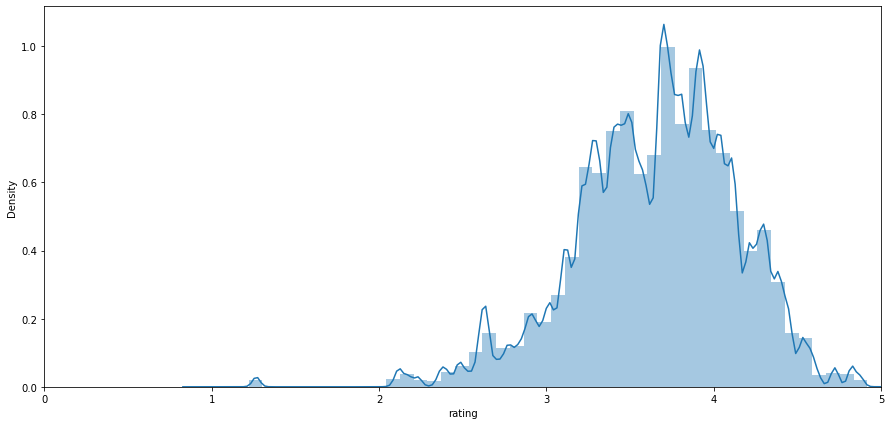

In [133]:
#Check ratings
plt.figure(figsize=(15,7))
sns.distplot(list(predicted_rating_u.stack()))
plt.xlim(0,5)
plt.xlabel('rating')
plt.savefig('uu_pred.png')
plt.show()

In [134]:
#Preview of updated predicted ratings
predicted_rating_u

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,4.427493,4.339667,4.336254,4.380674,4.341987,4.369370,4.358942,4.380293,4.373229,4.352557,...,4.383916,4.384087,4.384759,4.385057,4.385407,4.384703,4.384308,4.385420,4.387528,4.381678
2,3.871989,3.882976,3.882580,3.890413,3.900553,3.872805,3.879184,3.886226,3.889567,3.911745,...,3.882686,3.885975,3.896226,3.886364,3.886657,3.886472,3.886190,3.886388,3.883555,3.886138
3,2.391321,2.435349,2.422593,2.417238,2.435348,2.444928,2.442827,2.410824,2.406932,2.430707,...,2.413440,2.410867,2.412978,2.413793,2.413793,2.413689,2.410643,2.413480,2.420498,2.416715
4,3.527747,3.499995,3.500910,3.505661,3.486703,3.494185,3.485359,3.506020,3.503230,3.509275,...,3.506593,3.507565,3.505083,3.506173,3.506982,3.505891,3.506919,3.506483,3.506435,3.503282
5,3.786187,3.690142,3.697730,3.697314,3.686150,3.718799,3.697402,3.693210,3.691213,3.654658,...,3.697469,3.695768,3.696237,3.696970,3.697625,3.696941,3.697179,3.696995,3.698681,3.696735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.641180,3.623540,3.659589,3.661216,3.605405,3.719155,3.638994,3.659835,3.660705,3.647074,...,3.663346,3.662190,3.665105,3.666866,3.684857,3.666479,3.665828,3.667162,3.672865,3.664103
607,3.784384,3.721818,3.742235,3.728449,3.712111,3.727048,3.712414,3.704588,3.711996,3.697857,...,3.714004,3.710756,3.710256,3.714286,3.714466,3.714587,3.714306,3.714381,3.715568,3.713394
608,3.248477,3.060337,3.071250,3.155824,3.110690,3.229758,3.127865,3.159450,3.146006,3.174681,...,3.157507,3.159266,3.157095,3.162119,3.163027,3.161168,3.160129,3.162323,3.167648,3.160215


### 6.3 Item-item collaborative-based filtering

*6.3.1 Item similarities (cosine similarities)*

In [135]:
#Item similarities
item_similarities = []
train_ui_i = train_ui.fillna(0)

for movieId_i in movieIds:
    cos_sim_i = []
    movie_i = train_ui_i[movieId_i].to_numpy().reshape(-1,1).transpose()

    for movieId_j in movieIds:
        movie_j = train_ui_i[movieId_j].to_numpy().reshape(-1,1).transpose()
        cos_sim_ = cosine_similarity(movie_i, movie_j)[0][0]
        cos_sim_i.append(cos_sim_)   

    item_similarities.append(cos_sim_i)

In [136]:
#Convert to dataframe
item_similarities = pd.DataFrame(item_similarities)

item_similarities.index = movieIds
item_similarities.index.name = 'movieId'

item_similarities.columns = movieIds
item_similarities.columns.name = 'movieId'

In [137]:
#Preview 
item_similarities

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.321630,0.248469,0.000000,0.254341,0.222876,0.215922,0.090063,0.154768,0.262416,...,0.080513,0.022802,0.029119,0.0,0.050321,0.0,0.000000,0.100641,0.069423,0.100641
2,0.321630,1.000000,0.259464,0.033346,0.234017,0.210650,0.194477,0.013236,0.000000,0.280765,...,0.122269,0.076183,0.064631,0.0,0.000000,0.0,0.152837,0.091702,0.162096,0.091702
3,0.248469,0.259464,1.000000,0.000000,0.310426,0.164893,0.343764,0.180705,0.192529,0.167330,...,0.000000,0.034039,0.033437,0.0,0.000000,0.0,0.000000,0.150235,0.000000,0.150235
4,0.000000,0.033346,0.000000,1.000000,0.122820,0.127152,0.254403,0.236189,0.000000,0.058365,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,0.254341,0.234017,0.310426,0.122820,1.000000,0.189118,0.415014,0.000000,0.168044,0.134512,...,0.000000,0.036012,0.138554,0.0,0.000000,0.0,0.000000,0.158944,0.000000,0.158944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119591,0.000000,0.144171,0.102138,...,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
32743,0.000000,0.152837,0.000000,0.000000,0.000000,0.145695,0.000000,0.000000,0.000000,0.145912,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.431131,0.000000
98279,0.100641,0.091702,0.150235,0.000000,0.158944,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.226572,0.222566,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000


*6.3.2 Check item similarities*

In [138]:
#Check for nulls
item_similarities.isnull().sum().sum()!=0

False

In [139]:
#Number of ratings not in between 0 to 5 
print('Number of item similarities less than 0: ', sum([item_similarities < 0]).sum().sum())
print('Number of item similarities greater than 1: ', sum([item_similarities > 1]).sum().sum())

Number of item similarities less than 0:  0
Number of item similarities greater than 1:  876


In [140]:
#Largest value in item_similarities
item_similarities.max().max()

1.0000000000000004

*6.3.3 Calculate rating predictions*

Predicted ratings is equal to a) the dot product of user ratings and item similarities, divided by b) the summation of item correlations.

In [141]:
#Numerator component
weighted_rating_i = pd.DataFrame(np.dot(train_ui_i, item_similarities))

weighted_rating_i.index = userIds
weighted_rating_i.index.name = 'userId'
weighted_rating_i.columns = movieIds
weighted_rating_i.columns.name = 'movieId'

weighted_rating_i

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,169.415084,149.932156,133.052763,20.598299,84.616663,156.203362,85.434271,38.330718,17.406725,137.935542,...,26.607464,24.253693,30.990184,0.0,26.684950,55.350307,57.219868,48.364540,59.899725,48.364540
2,13.185632,12.507992,5.308413,0.760014,6.953036,9.413795,4.761327,2.911838,0.986096,8.743958,...,7.723986,5.002848,11.750346,0.0,1.468246,6.385897,2.655643,6.104908,11.904859,6.104908
3,6.308494,5.723100,4.793556,1.039709,3.445979,5.784737,2.917850,1.497751,1.104710,5.224984,...,0.284507,0.850350,1.008695,0.0,0.626910,3.315593,3.130376,3.225516,4.701945,3.225516
4,88.887856,76.094902,49.502207,23.606318,50.867995,85.782371,59.237224,17.827741,9.932351,71.362966,...,13.988344,12.175343,15.558164,0.0,35.980707,39.862528,12.841479,24.283037,25.828060,24.283037
5,29.614353,29.382208,18.376910,14.779517,19.405112,25.752636,21.291447,13.100766,3.218636,29.896362,...,2.850759,2.782919,3.160194,0.0,8.221318,5.895370,4.980403,4.316666,6.065061,4.316666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,414.103994,328.373783,197.730067,72.874021,216.219874,314.281592,230.883990,62.085827,33.493787,271.652401,...,73.116546,67.218466,85.920080,0.0,1266.909595,163.560245,80.484036,115.540254,158.515091,115.540254
607,118.799722,101.470921,70.972004,18.898753,59.066766,97.696692,61.042583,29.733597,11.039724,95.736583,...,16.242029,15.276952,20.494175,0.0,20.768761,38.637999,26.011045,28.874304,35.614548,28.874304
608,352.792264,367.154317,252.531678,46.920590,202.693805,303.616552,199.241705,101.655955,48.045730,310.573035,...,92.529357,60.822584,103.430517,0.0,70.711328,161.643235,145.442576,126.183550,186.829702,126.183550


In [142]:
#Denominator of adjustment for ratings
sum_weights_i = np.dot(true_ui_bool, item_similarities)
sum_weights_i = pd.DataFrame(sum_weights_i)

sum_weights_i.index = userIds
sum_weights_i.index.name = 'userId'
sum_weights_i.columns = movieIds
sum_weights_i.columns.name = 'movieId'

#Preview
sum_weights_i

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,38.509924,34.093912,30.350318,4.683586,19.301387,35.570475,19.609655,8.814171,4.162371,31.547014,...,6.173205,5.312821,7.041719,0.0,5.904280,12.722010,12.755141,10.914911,13.292313,10.914911
2,3.454768,3.307077,1.460525,0.205992,1.832495,2.478516,1.274165,0.757461,0.263167,2.300287,...,1.927027,1.368707,2.866659,0.0,0.367305,1.674092,0.741349,1.862860,3.012903,1.862860
3,3.772780,3.529894,2.686152,1.410893,2.321504,3.204963,2.332360,0.920337,0.582953,2.830234,...,0.142254,0.491782,0.806098,0.0,1.253821,1.768512,1.422419,1.755472,1.987691,1.755472
4,25.745289,22.126480,14.369119,6.896546,14.444218,24.801720,17.104422,5.706362,2.972193,21.200016,...,3.975456,3.577008,4.311678,0.0,9.869314,11.032259,4.004655,6.609655,7.379826,6.609655
5,8.078416,8.219237,5.203001,4.141481,5.356083,7.142666,5.909631,3.541559,0.859860,8.515153,...,0.814025,0.860860,0.910622,0.0,2.095834,1.645622,1.393117,1.323062,1.713113,1.323062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,112.930995,91.167944,55.900837,19.476527,59.954471,84.180219,63.001854,17.824571,9.471770,75.137267,...,22.036033,18.844113,24.546762,0.0,341.727250,46.459516,22.882383,34.947844,42.644969,34.947844
607,32.065082,27.456625,19.096071,5.087073,15.973816,26.200530,16.562388,7.949148,3.210522,25.862611,...,4.549598,4.399157,5.709147,0.0,5.552192,10.860494,7.011143,7.589625,9.553420,7.589625
608,109.030085,114.652995,81.652349,17.136514,65.001447,91.514616,65.424826,34.349724,17.351457,96.192140,...,26.563056,18.492909,31.153797,0.0,21.046089,54.272771,46.337669,41.396649,54.958338,41.396649


In [143]:
#Predicted ratings dataframe
predicted_rating_i = weighted_rating_i/sum_weights_i

#fillna(0): for dividing zeroes from 'sum_weights_i'
predicted_rating_i = predicted_rating_i.fillna(0)

predicted_rating_i.index = userIds
predicted_rating_i.index.name = 'userId'
predicted_rating_i.columns = movieIds
predicted_rating_i.columns.name = 'movieId'

In [144]:
#Predicted ratings for all movies
predicted_rating_i

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,4.399258,4.397623,4.383900,4.397976,4.383968,4.391377,4.356745,4.348761,4.181925,4.372380,...,4.310154,4.565125,4.400940,0.0,4.519594,4.350752,4.486024,4.431052,4.506343,4.431052
2,3.816648,3.782189,3.634592,3.689522,3.794300,3.798158,3.736820,3.844211,3.747030,3.801246,...,4.008239,3.655164,4.098969,0.0,3.997348,3.814542,3.582178,3.277170,3.951292,3.277170
3,1.672108,1.621323,1.784543,0.736915,1.484373,1.804931,1.251029,1.627394,1.895025,1.846131,...,2.000000,1.729122,1.251330,0.0,0.500000,1.874792,2.200741,1.837407,2.365532,1.837407
4,3.452587,3.439087,3.445041,3.422919,3.521686,3.458727,3.463270,3.124187,3.341759,3.366175,...,3.518677,3.403778,3.608378,0.0,3.645715,3.613270,3.206638,3.673874,3.499820,3.673874
5,3.665861,3.574810,3.531982,3.568655,3.623004,3.605466,3.602839,3.699152,3.743209,3.510960,...,3.502052,3.232720,3.470367,0.0,3.922695,3.582456,3.575006,3.262633,3.540373,3.262633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.666876,3.601856,3.537158,3.741633,3.606401,3.733438,3.664717,3.483160,3.536170,3.615415,...,3.318045,3.567080,3.500261,0.0,3.707371,3.520490,3.517293,3.306077,3.717088,3.306077
607,3.704956,3.695681,3.716576,3.715055,3.697724,3.728806,3.685615,3.740476,3.438607,3.701737,...,3.569992,3.472700,3.589709,0.0,3.740642,3.557665,3.709958,3.804444,3.727937,3.804444
608,3.235733,3.202309,3.092767,2.738047,3.118297,3.317684,3.045353,2.959440,2.768974,3.228674,...,3.483385,3.288968,3.319997,0.0,3.359832,2.978349,3.138755,3.048159,3.399479,3.048159


In [145]:
#Predictions ratings for unseen movies only
item_item_rec = predicted_rating_i*pred_ui_bool

In [146]:
item_item_rec

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,4.397623,0.000000,4.397976,4.383968,0.000000,4.356745,4.348761,4.181925,4.372380,...,4.310154,4.565125,4.400940,0.0,4.519594,4.350752,4.486024,4.431052,4.506343,4.431052
2,3.816648,3.782189,3.634592,3.689522,3.794300,3.798158,3.736820,3.844211,3.747030,3.801246,...,4.008239,3.655164,4.098969,0.0,3.997348,3.814542,3.582178,3.277170,3.951292,3.277170
3,1.672108,1.621323,1.784543,0.736915,1.484373,1.804931,1.251029,1.627394,1.895025,1.846131,...,2.000000,1.729122,1.251330,0.0,0.500000,1.874792,2.200741,1.837407,2.365532,1.837407
4,3.452587,3.439087,3.445041,3.422919,3.521686,3.458727,3.463270,3.124187,3.341759,3.366175,...,3.518677,3.403778,3.608378,0.0,3.645715,3.613270,3.206638,3.673874,3.499820,3.673874
5,3.665861,3.574810,3.531982,3.568655,3.623004,3.605466,3.602839,3.699152,3.743209,3.510960,...,3.502052,3.232720,3.470367,0.0,3.922695,3.582456,3.575006,3.262633,3.540373,3.262633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.000000,3.601856,3.537158,3.741633,3.606401,3.733438,3.664717,3.483160,3.536170,3.615415,...,3.318045,3.567080,3.500261,0.0,0.000000,3.520490,3.517293,3.306077,3.717088,3.306077
607,0.000000,3.695681,3.716576,3.715055,3.697724,3.728806,3.685615,3.740476,3.438607,3.701737,...,3.569992,3.472700,3.589709,0.0,3.740642,3.557665,3.709958,3.804444,3.727937,3.804444
608,3.235733,0.000000,0.000000,2.738047,3.118297,3.317684,3.045353,2.959440,2.768974,3.228674,...,3.483385,3.288968,3.319997,0.0,3.359832,2.978349,3.138755,3.048159,3.399479,3.048159


*6.3.4 Store ordered recommendations*

In [147]:
#Store ordered recommendations 
item_item_rec_ordered = []
for userId in userIds:
    rec_ = list(item_item_rec.loc[userId].sort_values(ascending=False).index)
    item_item_rec_ordered.append(rec_)

In [148]:
#Convert to lists to store in 'user_items'
item_item_rec_ordered = pd.DataFrame(item_item_rec_ordered)
item_item_rec_ordered = item_item_rec_ordered.values.tolist()

In [149]:
#Store recommendations
user_items['item_item_rec']=item_item_rec_ordered

In [150]:
#Preview
user_items

,movieId,rating,actuals,content_based_rec,user_user_rec,item_item_rec
userId,,,,,,
1,"[1, 3, 6, 47, 50, 70, 101, 151, 157, 163, 223,...","[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, ...","[2991, 3053, 2459, 1198, 1025, 2502, 608, 5060...","[180497, 26171, 178615, 74647, 128852, 4298, 5...","[318, 296, 858, 1198, 593, 1210, 356, 1221, 42...","[160848, 169034, 167732, 2493, 4957, 1140, 103..."
2,"[318, 333, 131724, 1704, 68157, 71535, 6874, 1...","[3.0, 4.0, 5.0, 4.5, 4.5, 3.0, 4.0, 5.0, 3.5, ...","[89774, 58559, 80489, 74458, 3578]","[180497, 4105, 81784, 71530, 4366, 20, 5771, 4...","[344, 367, 72998, 434, 410, 44, 788, 231, 208,...","[4402, 101973, 133780, 152270, 138396, 112454,..."
3,"[31, 647, 688, 720, 849, 1124, 1263, 1272, 130...","[0.5, 0.5, 0.5, 0.5, 5.0, 0.5, 0.5, 0.5, 0.5, ...","[5919, 5746, 1587, 26409]","[178615, 172233, 44511, 171811, 5325, 140816, ...","[380, 173, 47, 880, 788, 3535, 420, 3527, 2985...","[6949, 93610, 1105, 6752, 2582, 1167, 879, 889..."
4,"[21, 32, 47, 52, 58, 106, 125, 126, 162, 171, ...","[3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 1.0, 5.0, ...","[920, 2599, 1197, 1080, 3044, 1947, 910, 265, ...","[180497, 4105, 4298, 5670, 73042, 6319, 26171,...","[318, 858, 1097, 750, 1247, 1270, 260, 111, 27...","[190209, 190213, 96430, 190221, 190219, 189111..."
5,"[34, 36, 58, 153, 232, 247, 261, 266, 290, 296...","[4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 4.0, 1.0, 5.0, ...","[21, 367, 474, 1, 50, 110]","[1635, 4105, 122932, 180497, 27370, 7301, 6319...","[50, 593, 356, 150, 1, 32, 161, 110, 4226, 858...","[185031, 173925, 83369, 176601, 170827, 4523, ..."
...,...,...,...,...,...,...
606,"[1, 11, 15, 18, 19, 29, 32, 36, 47, 58, 73, 80...","[2.5, 2.5, 3.5, 4.0, 2.0, 4.5, 4.0, 3.5, 3.0, ...","[1089, 2997, 910, 2360, 2959, 1682, 1193, 3855...","[4105, 4298, 180497, 6994, 3445, 5009, 1642, 8...","[2959, 50, 608, 1221, 1197, 4973, 1213, 1089, ...","[44889, 169034, 160848, 44633, 26366, 6408, 26..."
607,"[1, 11, 25, 112, 153, 165, 188, 204, 208, 241,...","[4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, ...","[1370, 2762, 110, 2571, 150, 3347, 1974, 1407,...","[180497, 4298, 4105, 178615, 71530, 26171, 422...","[318, 110, 356, 364, 32, 47, 595, 150, 1221, 5...","[120130, 114265, 124851, 44633, 167732, 113829..."
608,"[2, 3, 16, 21, 24, 31, 32, 34, 39, 44, 47, 48,...","[2.0, 2.0, 4.5, 3.5, 2.0, 3.0, 3.5, 3.5, 3.0, ...","[7373, 296, 53996, 3949, 2502, 54503, 6373, 65...","[180497, 4298, 26171, 71530, 5670, 178615, 141...","[296, 593, 1198, 1197, 608, 7361, 4993, 7153, ...","[124851, 113829, 114265, 189111, 190209, 19021..."


*6.3.5 Ensure valid rating predictions*

In [151]:
#Number of ratings not in between 0 to 5 
print('Number of predicted ratings less than 0: ', sum([predicted_rating_i < 0]).sum().sum())
print('Number of predicted ratings greater than 5: ', sum([predicted_rating_i > 5]).sum().sum())

Number of predicted ratings less than 0:  0
Number of predicted ratings greater than 5:  7381


In [152]:
#Highest rating
predicted_rating_i.max().max()

5.000000000000003

In [153]:
#Convert predicted ratings greater than 5 to equal 5
predicted_rating_i[predicted_rating_i > 5] = 5

C:\Users\61406\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


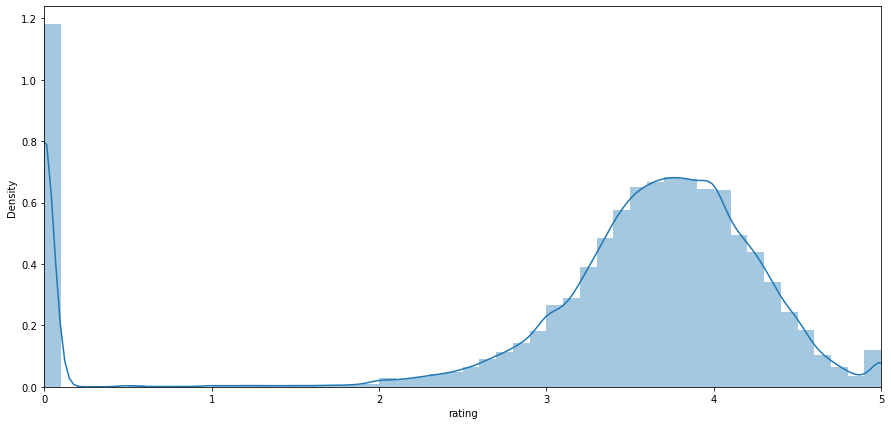

In [166]:
#Check ratings
plt.figure(figsize=(15,7))
sns.distplot(list(predicted_rating_i.stack()))
plt.xlim(0,5)
plt.xlabel('rating')
plt.savefig('ii_pred.png')
plt.show()

In [155]:
#Preview of updated predicted ratings
predicted_rating_i

movieId,1,2,3,4,5,6,7,8,9,10,...,98239,98243,131013,131023,32728,163809,32743,98279,65514,98296
userId,,,,,,,,,,,,,,,,,,,,,
1,4.399258,4.397623,4.383900,4.397976,4.383968,4.391377,4.356745,4.348761,4.181925,4.372380,...,4.310154,4.565125,4.400940,0.0,4.519594,4.350752,4.486024,4.431052,4.506343,4.431052
2,3.816648,3.782189,3.634592,3.689522,3.794300,3.798158,3.736820,3.844211,3.747030,3.801246,...,4.008239,3.655164,4.098969,0.0,3.997348,3.814542,3.582178,3.277170,3.951292,3.277170
3,1.672108,1.621323,1.784543,0.736915,1.484373,1.804931,1.251029,1.627394,1.895025,1.846131,...,2.000000,1.729122,1.251330,0.0,0.500000,1.874792,2.200741,1.837407,2.365532,1.837407
4,3.452587,3.439087,3.445041,3.422919,3.521686,3.458727,3.463270,3.124187,3.341759,3.366175,...,3.518677,3.403778,3.608378,0.0,3.645715,3.613270,3.206638,3.673874,3.499820,3.673874
5,3.665861,3.574810,3.531982,3.568655,3.623004,3.605466,3.602839,3.699152,3.743209,3.510960,...,3.502052,3.232720,3.470367,0.0,3.922695,3.582456,3.575006,3.262633,3.540373,3.262633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.666876,3.601856,3.537158,3.741633,3.606401,3.733438,3.664717,3.483160,3.536170,3.615415,...,3.318045,3.567080,3.500261,0.0,3.707371,3.520490,3.517293,3.306077,3.717088,3.306077
607,3.704956,3.695681,3.716576,3.715055,3.697724,3.728806,3.685615,3.740476,3.438607,3.701737,...,3.569992,3.472700,3.589709,0.0,3.740642,3.557665,3.709958,3.804444,3.727937,3.804444
608,3.235733,3.202309,3.092767,2.738047,3.118297,3.317684,3.045353,2.959440,2.768974,3.228674,...,3.483385,3.288968,3.319997,0.0,3.359832,2.978349,3.138755,3.048159,3.399479,3.048159


### 5.4 Model-based collaborative filtering

* SVD and KNN recommenders from the Surprise package were used to demonstrate model-based collaborative filtering 
* Model-based collaborative filtering involved predicting test set movie ratings, which were ranked to provide recommendations
* KNN recommenders were designed to in a similar fashion to memory-based collaborative filtering - both user-user and item-item based.

In [157]:
#Surprise models - SVD, KNNWithMeans, KNNBasic

#SVD, matrix factorisation
svd = SVD()

#KNN user-user collaborative filtering
knn_uu = KNNWithMeans(sim_options = {'name': 'pearson'}, user_based = True)

#KNN item-item collaborative filtering
knn_ii = KNNBasic(sim_options = {'name': 'cosine'}, user_based = False)

surprise_models = [svd, knn_uu, knn_ii]

In [158]:
#Recommendations from surprise results

#Store recommendations
surprise_recs = []

for model in surprise_models: 
    model_recs = surprise_algo(model, trainset_surprise, testset_surprise, userIds)
    surprise_recs.append(model_recs) 

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [159]:
surprise_recs = pd.DataFrame(surprise_recs).transpose()
surprise_recs.index = userIds
surprise_recs.columns = ['SVD_recs', 'KNN_user_user_recs', 'KNN_item_item_recs']

In [160]:
#user_items = user_items[user_items.columns[:6]]

In [161]:
user_items = pd.merge(user_items, surprise_recs, left_index=True, right_index=True)
user_items

,movieId,rating,actuals,content_based_rec,user_user_rec,item_item_rec,SVD_recs,KNN_user_user_recs,KNN_item_item_recs
userId,,,,,,,,,
1,"[1, 3, 6, 47, 50, 70, 101, 151, 157, 163, 223,...","[4.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, ...","[2991, 3053, 2459, 1198, 1025, 2502, 608, 5060...","[180497, 26171, 178615, 74647, 128852, 4298, 5...","[318, 296, 858, 1198, 593, 1210, 356, 1221, 42...","[160848, 169034, 167732, 2493, 4957, 1140, 103...","[1198, 1258, 1210, 1208, 457, 608, 1206, 3448,...","[1198, 1258, 2502, 1222, 593, 1208, 1954, 457,...","[1210, 296, 356, 1208, 3578, 110, 1198, 1206, ..."
2,"[318, 333, 131724, 1704, 68157, 71535, 6874, 1...","[3.0, 4.0, 5.0, 4.5, 4.5, 3.0, 4.0, 5.0, 3.5, ...","[89774, 58559, 80489, 74458, 3578]","[180497, 4105, 81784, 71530, 4366, 20, 5771, 4...","[344, 367, 72998, 434, 410, 44, 788, 231, 208,...","[4402, 101973, 133780, 152270, 138396, 112454,...","[58559, 115713, 3578, 74458, 80489, 99114, 89774]","[99114, 115713, 58559, 3578, 80489, 74458, 89774]","[58559, 99114, 74458, 115713, 80489, 3578, 89774]"
3,"[31, 647, 688, 720, 849, 1124, 1263, 1272, 130...","[0.5, 0.5, 0.5, 0.5, 5.0, 0.5, 0.5, 0.5, 0.5, ...","[5919, 5746, 1587, 26409]","[178615, 172233, 44511, 171811, 5325, 140816, ...","[380, 173, 47, 880, 788, 3535, 420, 3527, 2985...","[6949, 93610, 1105, 6752, 2582, 1167, 879, 889...","[527, 3949, 914, 1275, 3210, 1587, 5919, 5746,...","[5919, 5746, 1275, 914, 1587, 527, 3210, 3949,...","[527, 914, 3949, 1275, 1093, 3210, 5919, 5746,..."
4,"[21, 32, 47, 52, 58, 106, 125, 126, 162, 171, ...","[3.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 1.0, 5.0, ...","[920, 2599, 1197, 1080, 3044, 1947, 910, 265, ...","[180497, 4105, 4298, 5670, 73042, 6319, 26171,...","[318, 858, 1097, 750, 1247, 1270, 260, 111, 27...","[190209, 190213, 96430, 190221, 190219, 189111...","[898, 1197, 1080, 260, 930, 899, 904, 910, 414...","[4273, 4144, 1060, 4881, 904, 1203, 930, 2395,...","[4273, 4144, 2959, 904, 898, 1197, 2324, 1203,..."
5,"[34, 36, 58, 153, 232, 247, 261, 266, 290, 296...","[4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 4.0, 1.0, 5.0, ...","[21, 367, 474, 1, 50, 110]","[1635, 4105, 122932, 180497, 27370, 7301, 6319...","[50, 593, 356, 150, 1, 32, 161, 110, 4226, 858...","[185031, 173925, 83369, 176601, 170827, 4523, ...","[50, 150, 1, 110, 265, 253, 474, 21, 357, 39, ...","[50, 1, 150, 265, 110, 474, 253, 357, 21, 39, ...","[50, 150, 110, 1, 265, 253, 474, 357, 21, 367,..."
...,...,...,...,...,...,...,...,...,...
606,"[1, 11, 15, 18, 19, 29, 32, 36, 47, 58, 73, 80...","[2.5, 2.5, 3.5, 4.0, 2.0, 4.5, 4.0, 3.5, 3.0, ...","[1089, 2997, 910, 2360, 2959, 1682, 1193, 3855...","[4105, 4298, 180497, 6994, 3445, 5009, 1642, 8...","[2959, 50, 608, 1221, 1197, 4973, 1213, 1089, ...","[44889, 169034, 160848, 44633, 26366, 6408, 26...","[2959, 4973, 50, 1234, 908, 1221, 2194, 3681, ...","[7327, 7121, 1217, 6791, 4745, 6100, 50, 2206,...","[3855, 7486, 7121, 1041, 2959, 1217, 8724, 356..."
607,"[1, 11, 25, 112, 153, 165, 188, 204, 208, 241,...","[4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 5.0, 3.0, 3.0, ...","[1370, 2762, 110, 2571, 150, 3347, 1974, 1407,...","[180497, 4298, 4105, 178615, 71530, 26171, 422...","[318, 110, 356, 364, 32, 47, 595, 150, 1221, 5...","[120130, 114265, 124851, 44633, 167732, 113829...","[318, 2028, 1394, 1304, 2571, 1240, 36, 1282, ...","[318, 110, 1394, 3347, 1997, 1282, 2747, 150, ...","[318, 2571, 150, 2028, 110, 1210, 2762, 1394, ..."
608,"[2, 3, 16, 21, 24, 31, 32, 34, 39, 44, 47, 48,...","[2.0, 2.0, 4.5, 3.5, 2.0, 3.0, 3.5, 3.5, 3.0, ...","[7373, 296, 53996, 3949, 2502, 54503, 6373, 65...","[180497, 4298, 26171, 71530, 5670, 178615, 141...","[296, 593, 1198, 1197, 608, 7361, 4993, 7153, ...","[124851, 113829, 114265, 189111, 190209, 19021...","[296, 608, 2502, 593, 2762, 111, 2529, 541, 83...","[296, 6857, 2550, 778, 2502, 608, 7361, 7153, ...","[296, 593, 7153, 7361, 1222, 1193, 4993, 2502,..."
